In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
plt.rcParams['figure.figsize'] = [20, 12]

In [2]:
def P_log_norm(a,sig_a):
    return np.exp(-np.log(a)**2/sig_a**2)

In [3]:
def chi_2(fi,si,ri,sri,a):
    return np.sum((fi - a*ri)**2 / (si**2 + a**2 * sri**2))

In [4]:
def chi_2_d(fi,si,ri,sri,a):
    return np.sum((2 * a * ri**2 * si**2 + 2 * sri * a**2 * fi * ri - 2 * fi * ri * si**2 - 2 * sri * a * fi**2) / (si**2 + a**2 * sri**2)**2)

In [5]:
photometries_source = np.array([1,2,3,4,5,6])
phot_err_source = np.array([0.1,0.2,0.1,0.1,0.3,0.1])

photometries_neigh = np.array([1.8,4,6,8.1,9.8,11.8])
phot_err_neigh = np.array([0.1,0.1,0.1,0.3,0.3,0.5])

In [6]:
a_s = np.linspace(.0001, 10, 1000)

In [7]:
chi_s = np.array([chi_2(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,a=a) for a in a_s])
chi_s_p = np.array([chi_2_d(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,a=a) for a in a_s])

In [8]:
num_d = derivative(lambda a_s: np.array([chi_2(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,a=a) for a in a_s]), a_s, dx=0.0001)

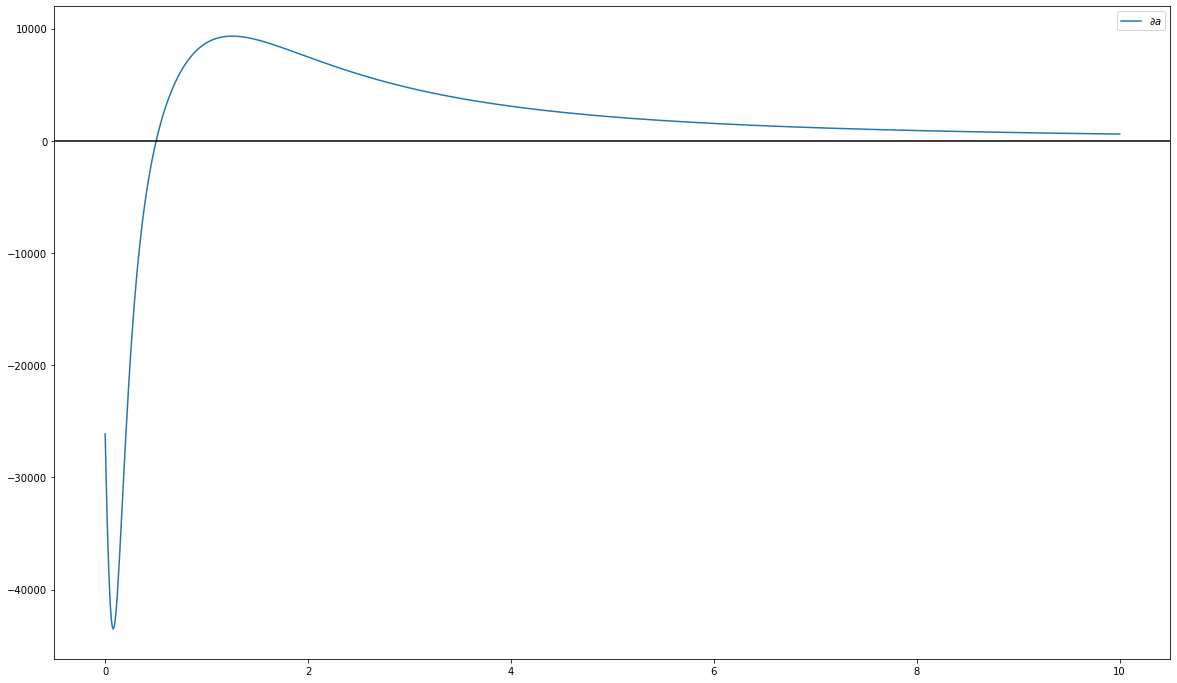

In [9]:
plt.figure()
#plt.plot(a_s, chi_s)
plt.plot(a_s, chi_s_p, label='$\partial a$')
#plt.plot(a_s, num_d, label='Numerical')
plt.axhline(0, 0, 4, c='black')
plt.legend()
plt.show()

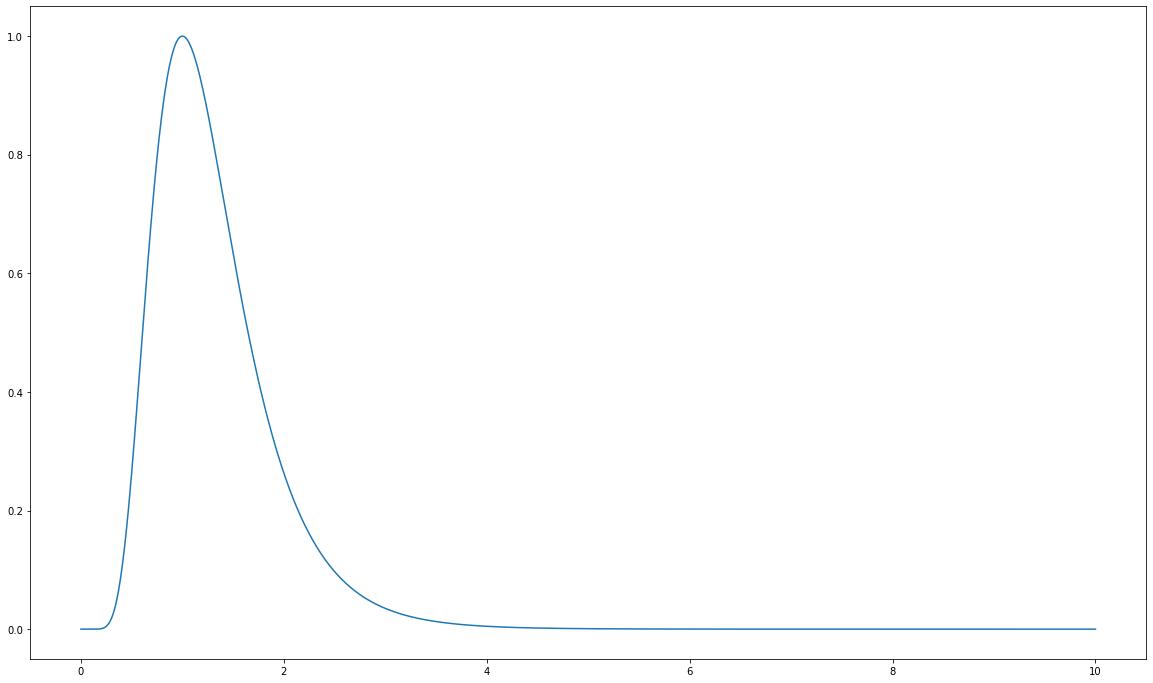

In [10]:
p_lognormal= P_log_norm(a_s,0.6)
plt.figure()
plt.plot(a_s, p_lognormal)

In [11]:
from scipy.optimize import fmin

In [12]:
def f(a):
    return np.exp(-np.log(a)**2/0.6**2) * np.exp(-chi_2(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,a=a)/2)

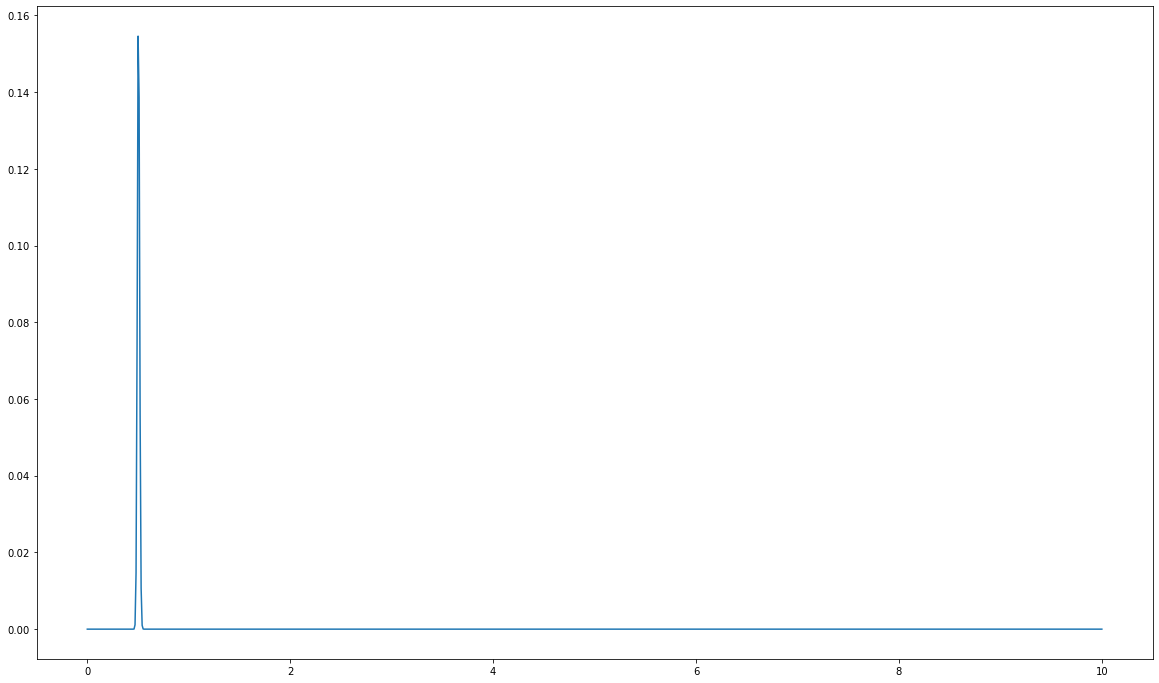

In [13]:
plt.figure()
plt.plot(a_s, [f(a) for a in a_s])

In [14]:
better = fmin(lambda a: -f(a), 0.5041114713270497)

Optimization terminated successfully.
         Current function value: -0.163353
         Iterations: 9
         Function evaluations: 18


In [16]:
better[0]

0.5042099305987933